In [26]:
from NCorrFP_scheme.demo import demo
from NCorrFP_scheme.NCorrFP import NCorrFP, sample_from_area
import pandas as pd
import numpy as np

In [2]:
# original data
data = "NCorrFP_scheme/test/test_data/synthetic_300_3_continuous.csv"
dataset = pd.read_csv(data)
correlated_attributes = ['X', 'Y']
primary_key_name = ['Id']
dataset.head(5)

,Id,X,Y,Z
0,0,51,42,29
1,1,46,29,22
2,2,60,44,28
3,3,68,52,39
4,4,48,35,25


In [3]:
secret_key = 101
recipient_id = 4
gamma = 1
fp_bit_length = 16
k = 10

In [4]:
scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
scheme = demo(scheme)  # wrapper for demo; does the embedding and detection

In [5]:
scheme.eval(data, correlated_attributes)

Start the demo NCorr fingerprint insertion algorithm...
	gamma: 1
	correlated attributes: ['X', 'Y']

Generated fingerprint for recipient 4: 0100000001100100

Generated fingerprint for recipient 4: 0100000001100100
Inserting the fingerprint...

Training balltrees in: 0.01 sec.
Fingerprint inserted.
Runtime: 1.54 sec.
Start demo NCorr fingerprint detection algorithm ...
	gamma: 1
	correlated attributes: ['X', 'Y']
Training balltrees in: 0.01 sec.
Fingerprint detected: 0100000001100100
Fingerprint belongs to Recipient 4
Runtime: 1.63 sec.
DONE!


In [6]:
# fingerprint = [0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0]

In [7]:
#scheme.show_embedding_iteration(0)

Detecting from record at idx: 299
Detecting from attribute: Y
      Id   X   Y   Z
299  299  58  49  35
Fingerpritned value: 49
----------------------------------------------------------
Obtaining neighbourhood....
Target values:[49, 37, 55, 30, 39, 56, 42, 42, 49, 31, 35, 53, 37, 49]
----------------------------------------------------------

--> Observing the distribution of target attribute Y below...
Mark bit (where in distribution falls the target value?): 0 (i.e. tails of distribution)
Mask bit (from PRNG): 0
Fingerprint bit index (from PRNG): 8
Fingerprint bit value (mark bit xor mask bit): 0

Fingerprint bit CORRECT :)


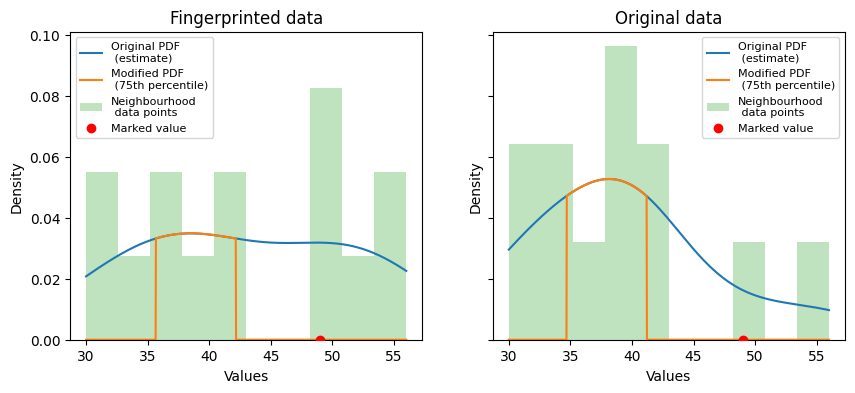

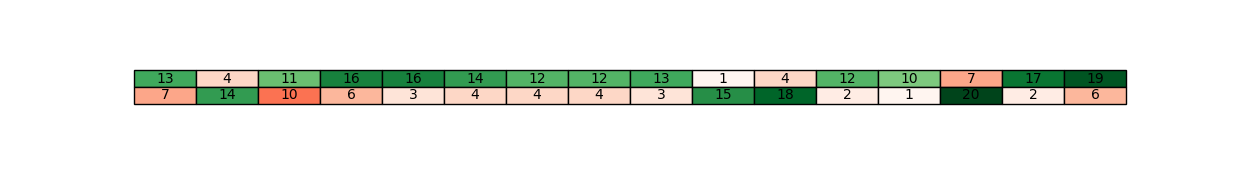

Table: fingerprint count updates after this iteration (iteration -1). Each column is one fingerprint bit position (e.g. 16-bit --> 16 columns), and each row represents votes for either 0 or 1 being the value of that bit. The final decision is made at the end af the detection algorithm according to majority vote.


In [8]:
scheme.show_detection_iteration(-1)

In [9]:
# # find all iterations with errors in detection 
# errors = []
# for iteration in range(len(det_iter_log)):
#     if det_iter_log[iteration]['fingerprint_bit'] != fingerprint[det_iter_log[iteration]['fingerprint_idx']]:
#         errors.append(iteration)


Detecting from attribute: Z
Fingerprinted value: 38
Mark bit (where in distribution falls the target value?): 1 (i.e. in densest area)

Detecting from attribute: X
Fingerprinted value: 65
Mark bit (where in distribution falls the target value?): 0 (i.e. tails of distribution)


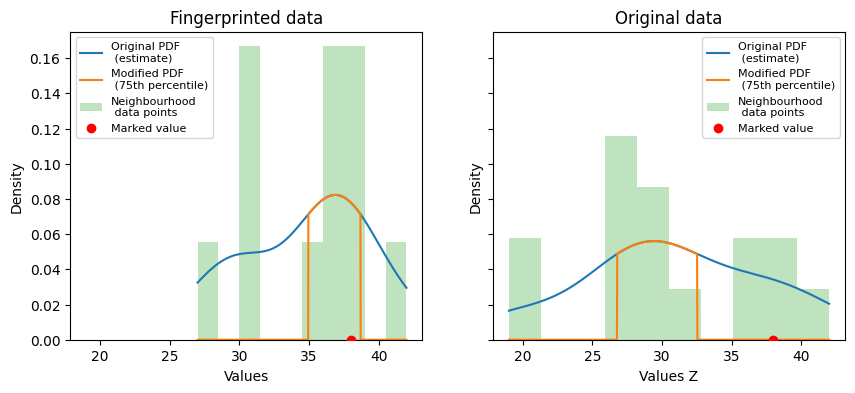

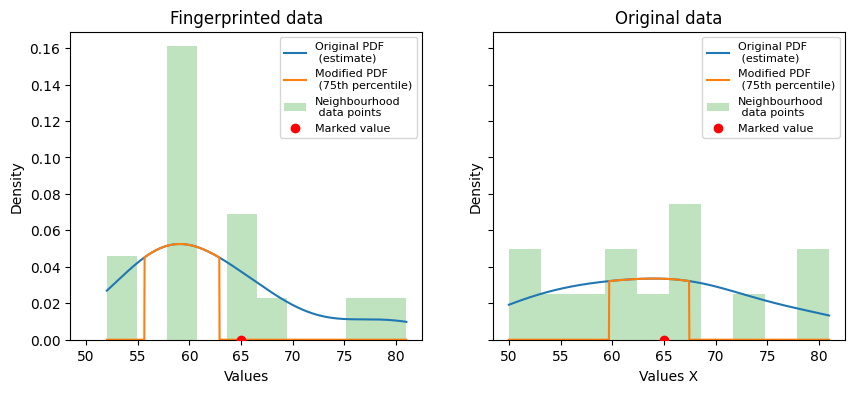

In [10]:
scheme.show_wrong_detections(batch=2)

In [11]:
scheme.total_errors()

68

In [12]:
scheme.error_rate()

0.22666666666666666

In [14]:
# error rate as a function of size of neighbourhood/total size
# data size = 300
neighbourhood_sizes = [0.02, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5, 0.6, 0.7, 0.99]
error_rates = []
correlation_scores = []
for k_rate in neighbourhood_sizes:
    k = int(k_rate*300)
    
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data, correlated_attributes, show_messages=False)
    
    error_rates.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.0 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0 sec.
Training balltrees in: 0.0 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training ba

In [22]:
correlation_scores

[0.7116115078899615,
 0.6922962583997375,
 0.6512089145510679,
 0.6363505996279896,
 0.5974448501837993,
 0.5822077101212473,
 0.5641315781889867,
 0.5501847406081781,
 0.5353250444752586,
 0.5230885046056812,
 0.4997493446529024,
 0.45606359741794966,
 0.4154648477208394,
 0.2451505106488846]

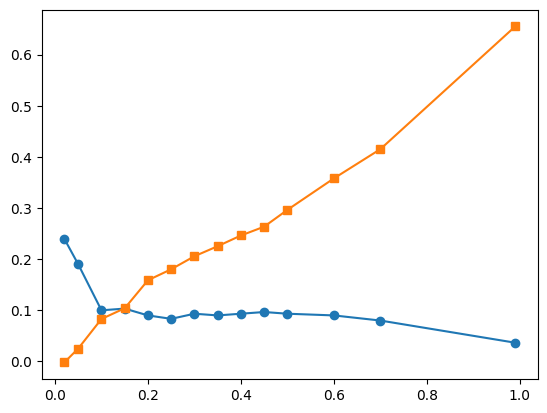

In [21]:
import matplotlib.pyplot as plt
plt.plot(neighbourhood_sizes, error_rates, marker='o', label='detection error rates')
plt.plot(neighbourhood_sizes, (correlation_original-correlation_scores)/correlation_original, marker='s', 
         label='norm correlation loss')
plt.legend()
plt.xlabel('Neighbourhood size (% from data size)')

Larger neighbourhood leads to less errors. However, larger neighbourhood implies that the correlations are not as preserved as we can see on the orange line; the loss in correlation is almost linear w.r.t. neighbourhood size -- it grows towards large neighbourhood sizes (eg. the final correlation scores drops to 0.25 from the original 0.71)

In [17]:
# correlation scores between X and Y - Pearson correlatio score
correlation_original = dataset['X'].corr(dataset['Y'])
correlation_original

0.7102056863131273

In [27]:
# zoom in on the interesting parts at neighbourhood size [2% - 30%]
# error rate as a function of size of neighbourhood/total size
# data size = 300
neighbourhood_sizes = list(np.arange(0.02, 0.30 + 0.04, 0.04))
error_rates = []
correlation_scores = []
for k_rate in neighbourhood_sizes:
    k = int(k_rate*300)
    
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=k)
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data, correlated_attributes, show_messages=False)
    
    error_rates.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.0 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.0 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training b

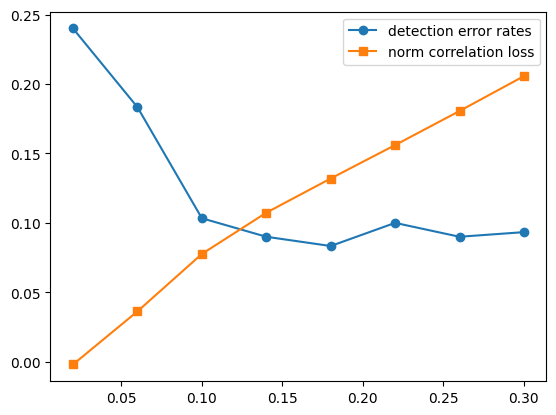

In [29]:
plt.plot(neighbourhood_sizes, error_rates, marker='o', label='detection error rates')
plt.plot(neighbourhood_sizes, (correlation_original-correlation_scores)/correlation_original, marker='s', 
         label='norm correlation loss')
plt.legend()
plt.xlabel('Neighbourhood size (% from data size)')

In [38]:
# further data sizes
data_3000 = "NCorrFP_scheme/test/test_data/synthetic_3000_3_continuous.csv"
dataset_3000 = pd.read_csv(data_3000)

data_10000 = "NCorrFP_scheme/test/test_data/synthetic_10000_3_continuous.csv"

In [ ]:
neighbourhood_sizes = list(np.arange(0.02, 0.30 + 0.04, 0.04))
error_rates_3000 = []
correlation_scores_3000 = []

error_rates_10000 = []
correlation_scores_10000 = []

for k_rate in neighbourhood_sizes:
    # data size 3000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*3000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_3000, correlated_attributes, show_messages=False)
    
    error_rates_3000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_3000.append(fp_data['X'].corr(fp_data['Y']))
    
    # data size 10 000
    scheme = NCorrFP(gamma=gamma, fingerprint_bit_length=fp_bit_length, k=int(k_rate*10000))
    scheme = demo(scheme)  # wrapper for demo; does the embedding and detection
    scheme.eval(data_10000, correlated_attributes, show_messages=False)
    
    error_rates_10000.append(scheme.error_rate())
    
    fp_data = scheme.fingerprinted_data
    correlation_scores_10000.append(fp_data['X'].corr(fp_data['Y']))


Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.02 sec.
Training balltrees in: 0.02 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.04 sec.
Training balltrees in: 0.02 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.01 sec.
Training balltrees in: 0.01 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.03 sec.
Training balltrees in: 0.04 sec.
DONE!

Generated fingerprint for recipient 4: 0100000001100100
Training balltrees in: 0.02 sec.


In [ ]:
plt.plot(neighbourhood_sizes, error_rates, marker='o', label='300 records')
plt.plot(neighbourhood_sizes, error_rates_3000, marker='s', label='3000 records')
plt.plot(neighbourhood_sizes, error_rates_10000, marker='s', label='10000 records')
plt.legend()
plt.xlabel('Neighbourhood size (% from data size)')

In [30]:
# error rates as a function of gamma